In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [2]:
#获取视频
cap=cv.VideoCapture('/Users/lixuecheng/Desktop/python/OpenCV/image/2021-7-28 10.18拍摄的影片.mov')

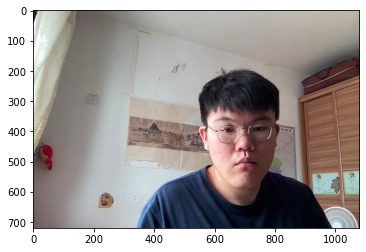

In [3]:
#指定追踪目标
ret,frame=cap.read()
r,h,c,w=400,200,600,300
win=(c,r,h,w)
plt.imshow(imutils.opencv2matplotlib(frame))

In [4]:
#ROI
roi=frame[r:r+h,c:c+w]

In [5]:
#计算直方图
hsv_roi=cv.cvtColor(roi,cv.COLOR_BGR2HSV)
roi_hist=cv.calcHist(hsv_roi,[0],None,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

array([[227.43243 ],
       [234.32433 ],
       [255.      ],
       [117.16216 ],
       [103.37838 ],
       [ 68.91892 ],
       [151.62163 ],
       [ 27.567568],
       [186.08109 ],
       [ 34.45946 ],
       [ 13.783784],
       [  0.      ],
       [  6.891892],
       [ 27.567568],
       [  0.      ],
       [ 48.243244],
       [  0.      ],
       [  6.891892],
       [  6.891892],
       [  6.891892],
       [  0.      ],
       [ 13.783784],
       [ 13.783784],
       [ 41.351353],
       [ 27.567568],
       [ 27.567568],
       [ 27.567568],
       [ 27.567568],
       [  6.891892],
       [ 13.783784],
       [ 34.45946 ],
       [ 20.675676],
       [ 13.783784],
       [ 13.783784],
       [ 13.783784],
       [ 20.675676],
       [ 34.45946 ],
       [ 41.351353],
       [ 20.675676],
       [  6.891892],
       [ 20.675676],
       [ 20.675676],
       [ 20.675676],
       [ 41.351353],
       [ 13.783784],
       [  6.891892],
       [ 20.675676],
       [ 48.2

In [6]:
#目标追踪
#终止条件
term=(cv.TERM_CRITERIA_EPS|cv.TERM_CRITERIA_COUNT,10,1)

In [7]:
while (True):
    ret,frame=cap.read()
    if ret==True:
        #计算这一帧的直方图
        hist=cv.cvtColor(frame,cv.COLOR_BGR2HSV)
        dst=cv.calcBackProject([hist],[0],roi_hist,[0,180],1)
        ret,win=cv.meanShift(dst,win,term)

        x,y,w,h=win

        img2=cv.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        cv.imshow("frame",img2)
        if cv.waitKey(200)&0xFF==27:
            break
cap.release()
cv.destroyAllWindows()